# SCS3201 - Assignment 2 - Random Forest Classification
## Predicting Presence of Heart Disease

> W. A. D. B. A. Abayaratna - 2018/CS/001 - 18000012

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

##Reading Dataset

In [ ]:
colnames=['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'] 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',names=colnames, header=None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df["target"]=[0 if i ==0 else 1 for i in df["target"]]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.shape

(303, 14)

## Dataset Pre-processing

In [ ]:
df[~(df=='?')].isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

###Remove rows with N/A values

In [ ]:
df = df[df.ca != '?']
df = df[df.thal != '?']

In [ ]:
df.shape

(297, 14)

In [ ]:
df[~(df=='?')].isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##Summarize Heart Disease Data

###All Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


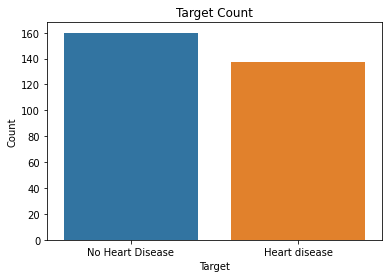

In [ ]:
ax = sns.countplot(df["target"])
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Heart Disease','Heart disease'])
plt.title("Target Count")
plt.show()


###Against Gender

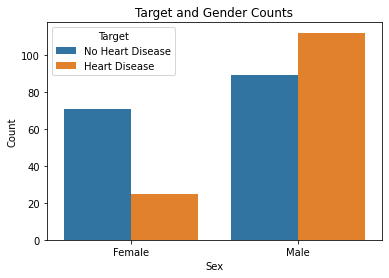

In [ ]:
ac = sns.countplot(x='sex', hue= 'target', data =df)
ac.set_xlabel('Sex')
ac.set_ylabel('Count')
ac.set_xticklabels(['Female','Male'])
plt.legend(title='Target', loc='upper left', labels=['No Heart Disease', 'Heart Disease'])
plt.title("Target and Gender Counts")
plt.show()

###Age Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


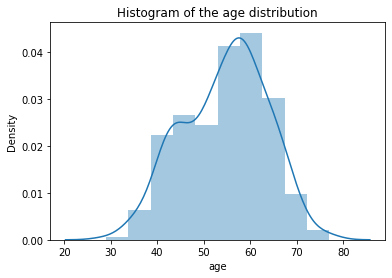

In [ ]:
sns.distplot(df["age"], bins=10)
plt.title("Histogram of the age distribution")
plt.show()

###Age and Max Heart Rate 

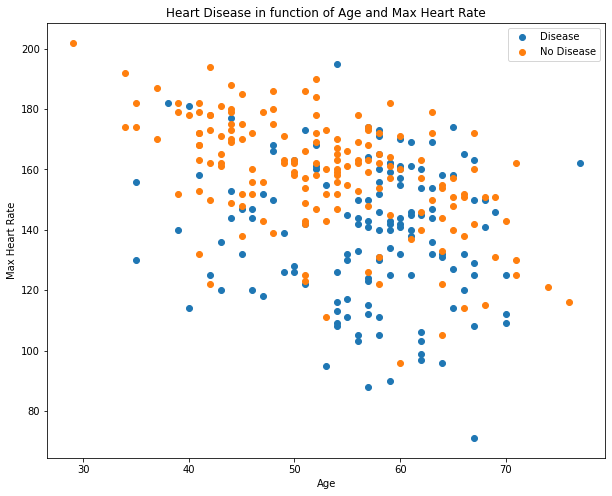

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

###Age with Target Count Distribution

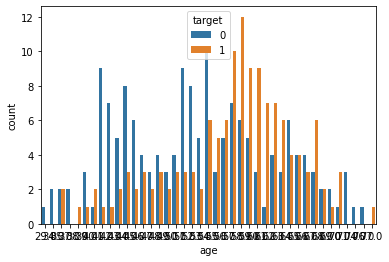

In [ ]:
sns.countplot (data=df, x='age', hue='target')

##Check the correlation between variables

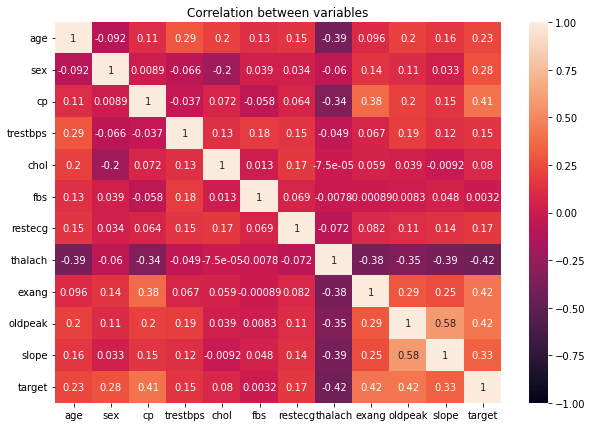

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.title("Correlation between variables")
plt.show()

#Random Forest Classification

### Setting X, Y variables

In [ ]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (297, 13) (297,)


###Splitting Dataset to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (237, 13) (237,)
shape of X and y respectively (test) : (60, 13) (60,)


###Employing Random Forest Classifier 

In [ ]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)


RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8


###Predicted count of heart diseases

In [ ]:
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart diseases:", rate_people)

% of people predicted with heart diseases: 0.43333333333333335


###Classification Summary

In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



###Plotting the Confusion Matrix

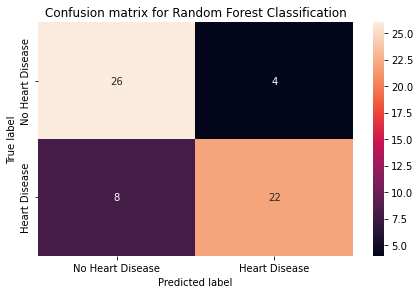

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease']);
ax.yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease']);
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()